# Prerequisite: Load data into pandas
Now you should start to develop your own diagrams. To do so, download the file <b>sales.csv</b> from Moodle and read it into pandas. 
<b>Hints:</b>
<ul>
    <li> Take a look at the parameter <i>parse_dates</i>.</li>
    <li> Of course you should start using a text editor to take a look at the contents.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
# load the data into pandas
df = pd.read_csv("sales.csv",sep=";",parse_dates=['Date'])
df.head()

,Date,Food,Print,Stationery
0,2016-01-01,13.0,NaN,19.0
1,2016-02-01,5.0,15.0,12.0
2,2016-03-01,1.0,10.0,20.0
3,2016-04-01,9.0,11.0,58.0
4,2016-05-01,NaN,31.0,10.0


# Exercise 1: Create charts conforming to IBCS using pandas and matplotlib
As a next step, create a bar chart conforming to IBCS displaying the yearly aggregates of items sold per article group as a stacked bar chart.

<b>Hints:</b>
<ul>
    <li>Take a look at the groupby function (http://pandas.pydata.org/pandas-docs/stable/groupby.html), in particular the aggregates section, first.</li>
    <li><i>df["Year"] = df.Date.dt.strftime('%Y')</i> extracts the year from a 'Date' column into a new column 'Year' .</li>
    <li>matplotlib.colors.ListedColormap(['darkgrey', 'grey','lightgrey']) creates a new colormap using certain greys.</li>
</ul>

In [3]:
df["Year"] = df.Date.dt.strftime('%Y')

grouped = df.groupby("Year")
dfgrouped = grouped.aggregate(sum)
dfgrouped.head()

,Food,Print,Stationery
Year,,,
2016,5419.0,5087.0,4655.0
2017,5132.0,5180.0,5220.0
2018,4426.0,5129.0,4995.0


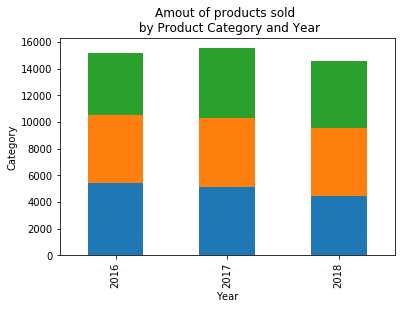

In [4]:
# for comparison: using matplotlib standard
ax = dfgrouped.plot(kind='bar', stacked=True, legend=False)
ax.set_ylabel("Category")
ax.set_title("Amout of products sold \n by Product Category and Year")
plt.show()

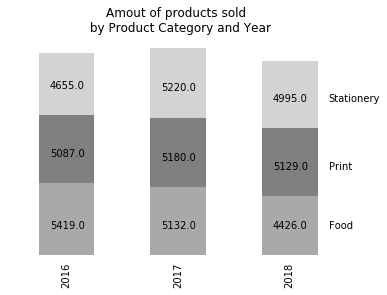

In [5]:
# applying IBCS rules
cmap = mp.colors.ListedColormap(['darkgrey', 'grey','lightgrey'])
ax = dfgrouped.plot(kind='bar', stacked=True, colormap=cmap, legend=False)
# remove labels
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Amout of products sold \n by Product Category and Year")
ax.tick_params(bottom=False, left=False, labelleft=False)
# add values to bars
for p in ax.patches:
    #           text                          x position               y position
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() + 0.1 , (p.get_y() + 2001.5) ))
ax.set_frame_on(False)    
# add category on right side
ax.annotate("Food",(ax.patches[2].get_x()+0.6,(ax.patches[2].get_y() + 2001.5)))
ax.annotate("Print",(ax.patches[5].get_x()+0.6,(ax.patches[5].get_y() + 2001.5)))
ax.annotate("Stationery",(ax.patches[8].get_x()+0.6,(ax.patches[8].get_y() + 2001.5)))
plt.show()

## Alternative: Horizontal bar chart

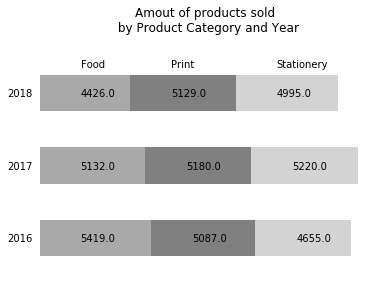

In [6]:
# horizotal bar chat
# title in a defined place

ax = dfgrouped.plot(kind='barh', stacked=True, color=['darkgrey', 'grey','lightgrey'],legend=False)

ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Amout of products sold \n by Product Category and Year", pad=25)
ax.tick_params(bottom=False,labelbottom=False, left=False)
# add values to bars
for p in ax.patches:
    #           text                          x position               y position    
    ax.annotate(str(round(p.get_width(),2)), (p.get_x() + 2000 , (p.get_y() + 0.2) ))
ax.set_frame_on(False)    


ax.annotate("Food",(ax.patches[2].get_x()+2000,(ax.patches[2].get_y() + 0.6)))
ax.annotate("Print",(ax.patches[5].get_x()+2000,(ax.patches[5].get_y() + 0.6)))
ax.annotate("Stationery",(ax.patches[8].get_x()+2000,(ax.patches[8].get_y() +0.6)))
# for bottom placing, comment the three lines above and uncomment the three lines below
#ax.annotate("Food",(ax.patches[2].get_x()+2000,(ax.patches[2].get_y() -2.2 )))
#ax.annotate("Print",(ax.patches[5].get_x()+2000,(ax.patches[5].get_y() -2.2)))
#ax.annotate("Stationery",(ax.patches[8].get_x()+2000,(ax.patches[8].get_y() -2.2)))
plt.show()